# 2d video analysis 

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as mtick

* trail: 视频编号
* COM： hip点
* 前 p position v velocity a acceleration 后h horizontal v

In [60]:
# divide by stride using breakpoint
# test = pd.read_csv('/Users/yifei/Documents/dshs/tsm7/Data/Minoo_trial1_COM_ah.csv')
def divide(data:pd.DataFrame):
    strides_start = []
    strides_end = [] 
    ans = []
    if 'Breakpoint' in data.columns:
        strides_start = list(data[data['Breakpoint'] == 1].index)[:-1]
        strides_end = list(data[data['Breakpoint'] == 1].index)[1:]

    for i, j in zip(strides_start,strides_end):
        ans.append(data.iloc[i:j+1].copy())
    return ans


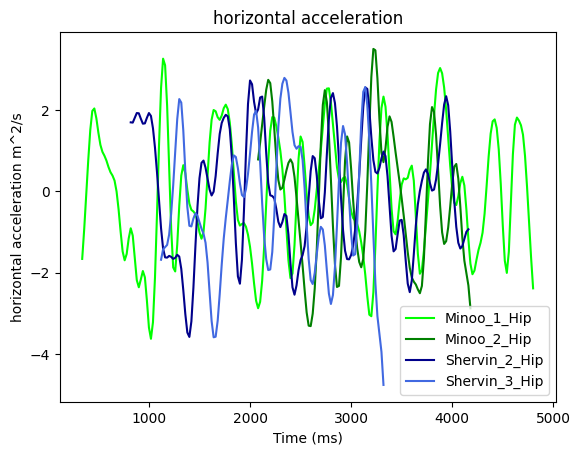

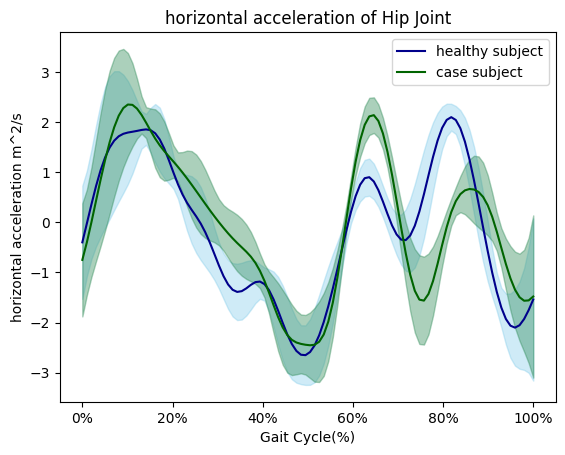

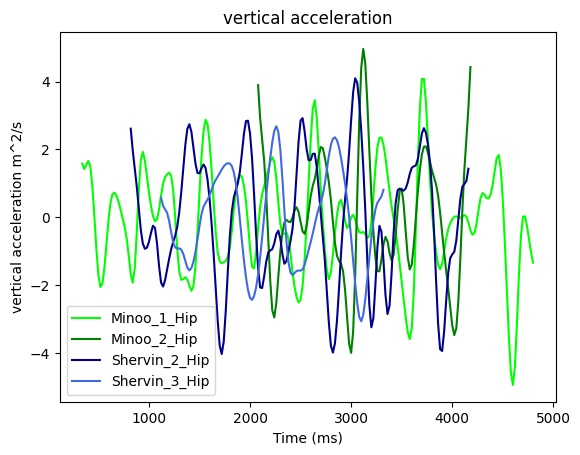

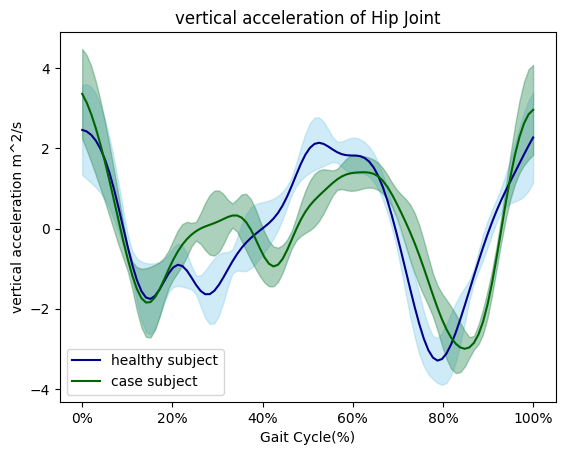

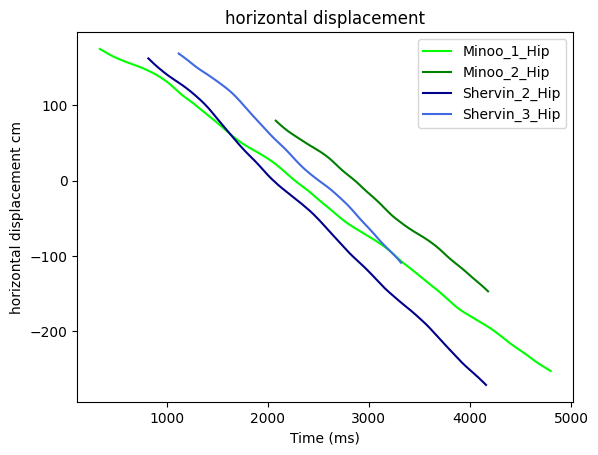

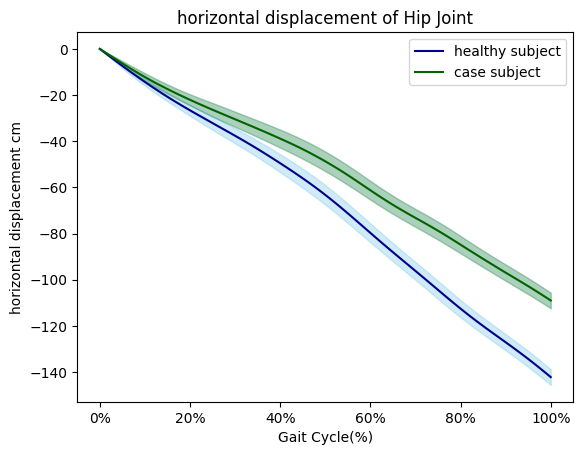

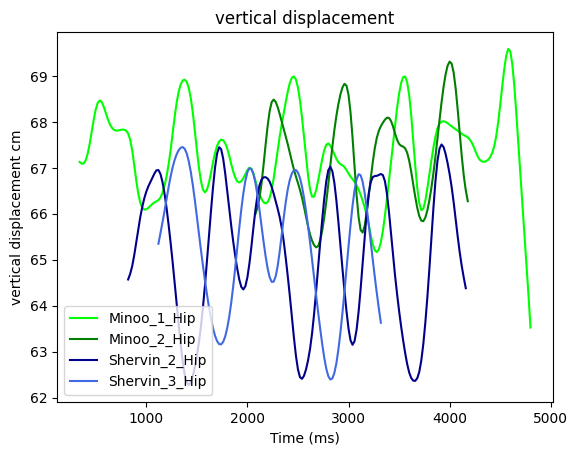

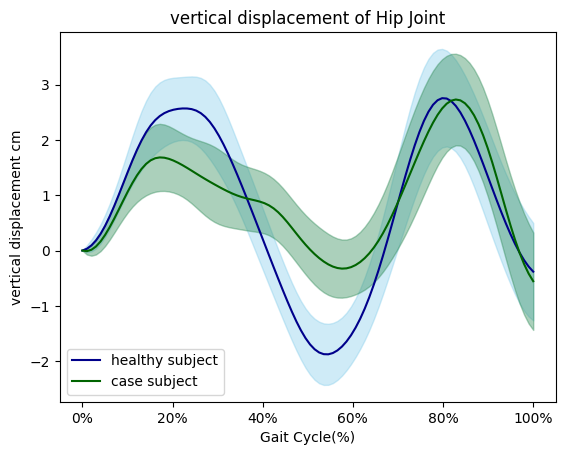

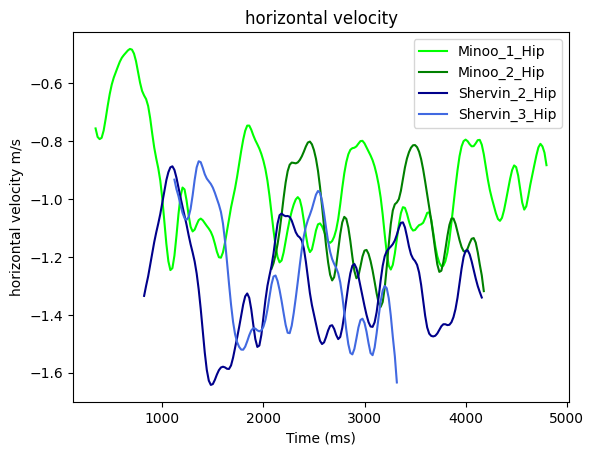

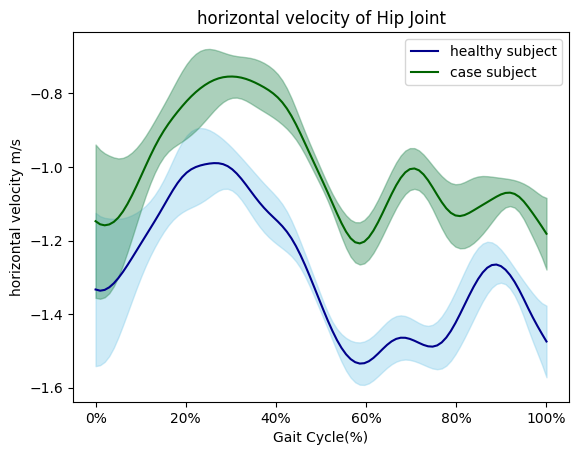

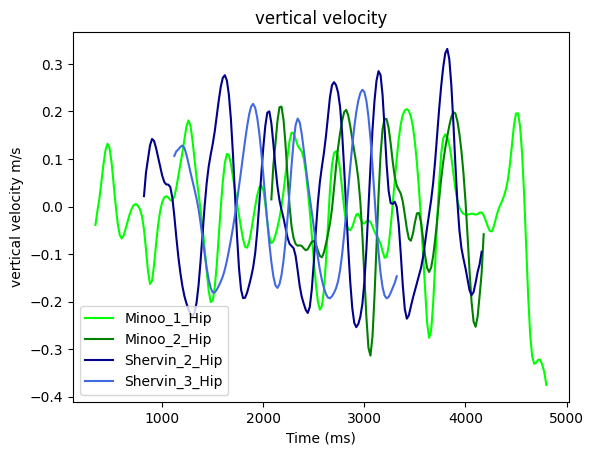

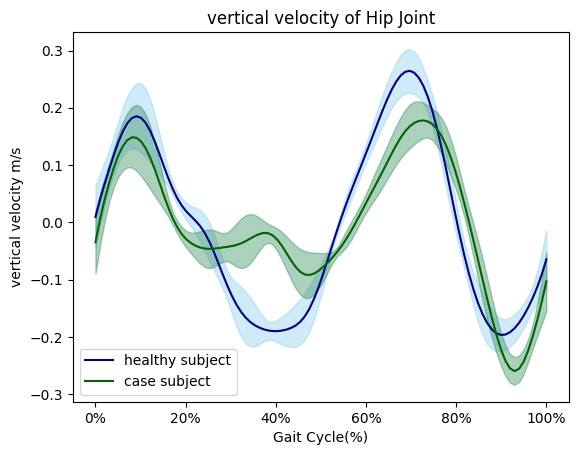

In [61]:
## displacement, velocity, acceleration
idxTitle =['ah', 'av', 'ph', 'pv', 'vh','vv']
fullTitle = ['horizontal acceleration','vertical acceleration', 'horizontal displacement', 'vertical displacement', 'horizontal velocity', 'vertical velocity']
ylabels = ['horizontal acceleration m^2/s','vertical acceleration m^2/s', 'horizontal displacement cm', 'vertical displacement cm', 'horizontal velocity m/s', 'vertical velocity m/s']
trail_names = ["Data/Minoo_trial1_COM_","Data/Minoo_trial2_COM_","Data/Shervin_trial2_COM_", "Data/Shervin_trial3_COM_"]
labels = ["Minoo_1_Hip","Minoo_2_Hip","Shervin_2_Hip", "Shervin_3_Hip"]
colors = ['lime','green', 'darkblue', 'royalblue']


for i in range(len(idxTitle)):
    m_strides =[]
    s_strides = []
    idxt = idxTitle[i]
    title = fullTitle[i]
    trail_names_subcate = list(map(lambda x: x +idxt +'.csv', trail_names))
    plt.title(title)
    plt.xlabel("Time (ms)")
    plt.ylabel(ylabels[i])
    for j in range(len(trail_names_subcate)):
        trail_name = trail_names_subcate[j]
        trail = pd.read_csv(trail_name)
        # 分步段
        strides = divide(trail)
        if 'p' in idxt:
            for idxstride in range(len(strides)):
                strides[idxstride]['Greater Trochanter (COM)'] -= strides[idxstride].iloc[0]['Greater Trochanter (COM)']
        if "Minoo" in trail_name:
            m_strides = m_strides + strides
        if "Shervin" in trail_name:
            s_strides = s_strides + strides
        plt.plot(trail['Time (ms)'], trail['Greater Trochanter (COM)'], color = colors[j], label = labels[j])
        # plt.scatter(trail['Time (ms)'], trail['Breakpoint'] , color = colors[j], s=10) 
    plt.legend()
    plt.show()

    #after spline result
    x_sum = np.linspace(0,1,100)
    spline_y_list_s = np.empty((0,100))
    for s in s_strides:
        # standardized into percentage
        time_percent = np.linspace(0, 1, len(s))
        spline = make_interp_spline(time_percent, s['Greater Trochanter (COM)'] )
        spline_y_list_s = np.vstack([spline_y_list_s, spline(x_sum)])
        # plt.plot(time_percent, spline(time_percent), color = "aqua")
        # plt.title("Shervin "+ title)

    y_sum_shervin = []
    y_err_shervin = []
    for k in range(len(x_sum)):
        y_sum_shervin.append(np.mean(spline_y_list_s[:,k]))
        y_err_shervin.append(np.std(spline_y_list_s[:,k]))

        
    plt.plot(x_sum, y_sum_shervin, color ='darkblue', label = 'healthy subject')
    plt.fill_between(x_sum, [s - e for s, e in zip(y_sum_shervin, y_err_shervin)] , [s + e for s, e in zip(y_sum_shervin, y_err_shervin)],
                 color='skyblue', alpha=0.4)
    # plt.show()
    
    spline_y_list_m = np.empty((0,100))
    for m in m_strides:
        # standardized into percentage
        time_percent = np.linspace(0, 1, len(m))
        spline = make_interp_spline(time_percent, m['Greater Trochanter (COM)'] )
        spline_y_list_m = np.vstack([spline_y_list_m, spline(x_sum)])
        # plt.plot(time_percent, spline(time_percent), color = "lime")
        # plt.title("Minoo " + title )

    y_sum_minoo = []
    y_err_minoo = []
    for k in range(len(x_sum)):
        y_sum_minoo.append(np.mean(spline_y_list_m[:,k]))
        y_err_minoo.append(np.std(spline_y_list_s[:,k]))

    plt.plot(x_sum, y_sum_minoo, color ='darkgreen', label = 'case subject') 
    plt.fill_between(x_sum, [s - e for s, e in zip(y_sum_minoo, y_err_minoo)], [s + e for s, e in zip(y_sum_minoo, y_err_minoo)],
                 color='seagreen', alpha=0.4)
    plt.title(title + " of Hip Joint")
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.xlabel("Gait Cycle(%)")
    plt.ylabel(ylabels[i])
    plt.legend()
    plt.show()
    


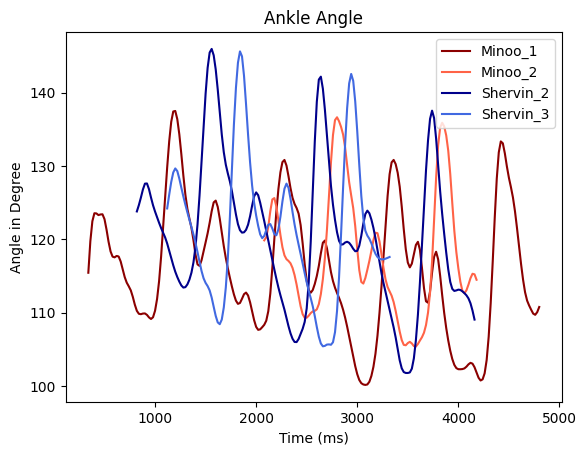

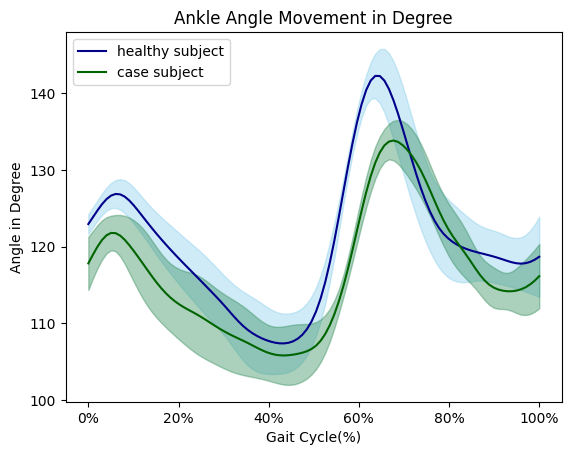

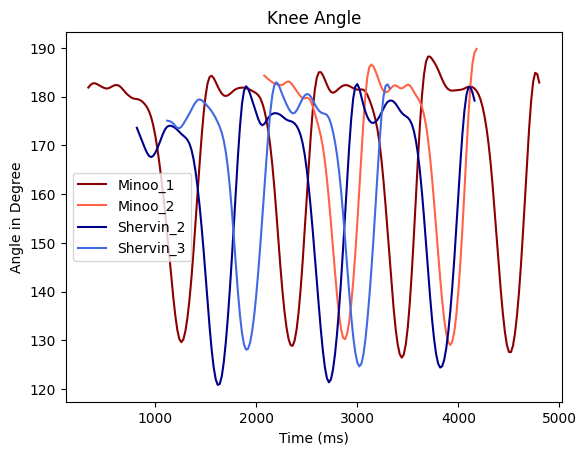

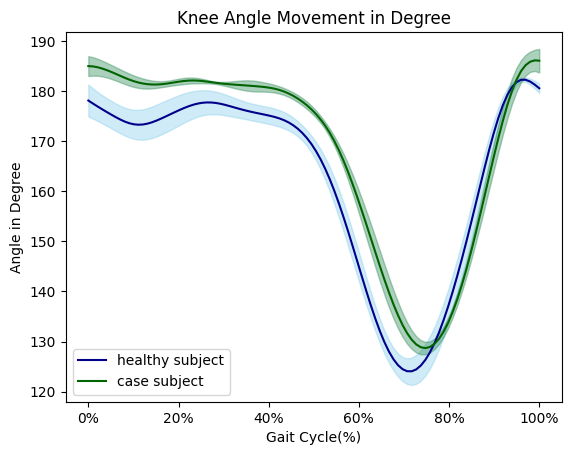

In [62]:
## angle in movement

fullTitle = ["Ankle Angle","Knee Angle"]
trail_names = ["Data/Minoo_trial1_knee_ankle_angle.csv","Data/Minoo_trial2_knee_ankle_angle.csv","Data/Shervin_trial2_knee_ankle_angle.csv", "Data/Shervin_trial3_knee_ankle_angle.csv"]
labels = ["Minoo_1","Minoo_2","Shervin_2", "Shervin_3"]
colors = ['darkred','tomato', 'darkblue', 'royalblue']

for i in range(len(fullTitle)):
    m_strides =[]
    s_strides = []
    title = fullTitle[i]
    plt.title(title)
    plt.xlabel("Time (ms)")
    plt.ylabel("Angle in Degree")
    for j in range(len(trail_names)):
        trail = trail_names[j]
        trail_data = pd.read_csv(trail)
        strides = divide(trail_data)

        if "Minoo" in trail:
            m_strides = m_strides + strides
        if "Shervin" in trail:
            s_strides = s_strides + strides
        plt.plot(trail_data['Time (ms)'], trail_data[title], color = colors[j], label = labels[j])
        
    plt.legend()
    plt.show()
        #after spline result
    x_sum = np.linspace(0,1,100)
    spline_y_list_s = np.empty((0,100))
    for s in s_strides:
        # standardized into percentage
        time_percent = np.linspace(0, 1, len(s))
        spline = make_interp_spline(time_percent, s[title] )
        spline_y_list_s = np.vstack([spline_y_list_s, spline(x_sum)])
        # plt.plot(time_percent, spline(time_percent), color = "aqua")
        # plt.title("Shervin "+ title)

    y_sum_shervin = []
    y_err_shervin = []
    for k in range(len(x_sum)):
        y_sum_shervin.append(np.mean(spline_y_list_s[:,k]))
        y_err_shervin.append(np.std(spline_y_list_s[:,k]))

        
    plt.plot(x_sum, y_sum_shervin, color ='darkblue', label = 'healthy subject')
    plt.fill_between(x_sum, [s - e for s, e in zip(y_sum_shervin, y_err_shervin)] , [s + e for s, e in zip(y_sum_shervin, y_err_shervin)],
                 color='skyblue', alpha=0.4)
    # plt.show()

    spline_y_list_m = np.empty((0,100))

    for m in m_strides:
        # standardized into percentage
        time_percent = np.linspace(0, 1, len(m))
        spline = make_interp_spline(time_percent, m[title] )
        spline_y_list_m = np.vstack([spline_y_list_m, spline(x_sum)])
        # plt.plot(time_percent, spline(time_percent), color = "aqua")
        # plt.title("Minoo " + title )

    y_sum_minoo = []
    y_err_minoo = []
    for k in range(len(x_sum)):
        y_sum_minoo.append(np.mean(spline_y_list_m[:,k]))
        y_err_minoo.append(np.std(spline_y_list_m[:,k]))

    plt.plot(x_sum, y_sum_minoo, color ='darkgreen', label = 'case subject') 
    plt.fill_between(x_sum, [s - e for s, e in zip(y_sum_minoo, y_err_minoo)], [s + e for s, e in zip(y_sum_minoo, y_err_minoo)],
                 color='seagreen', alpha=0.4)
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.xlabel("Gait Cycle(%)")
    plt.ylabel("Angle in Degree")
    plt.title(fullTitle[i] + " Movement in Degree")
    plt.legend()
    plt.show()

## positional, velocity, acceleration Notes
* record heights and weights
* acceleration pic is too complicated to obverse, displacement and verlecity are okay.
* velcocity is quicker on shervin (currently negetive)
* Shervin has an overall larger changing range between max and min speed
* didnt add breakpoint because it is quite messy
* recommend use one trail and clear one.

## Knee angle notes
* knee ankle has little fluctuation by Minoo
* fluctuation but with larger amplitutde from Shervin
* angles are similar

## Ankle
* smaller angle can be reach for Minoo, 100-135 degree
* larger angle can be reach for Shervin, 145-105 degree
